<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/Retail_Price_Optimization/blob/main/Retail_Price_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [ ]:
print(df.isnull().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


In [ ]:
print(df.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

Now let’s have a look at the distribution of the prices of the products:

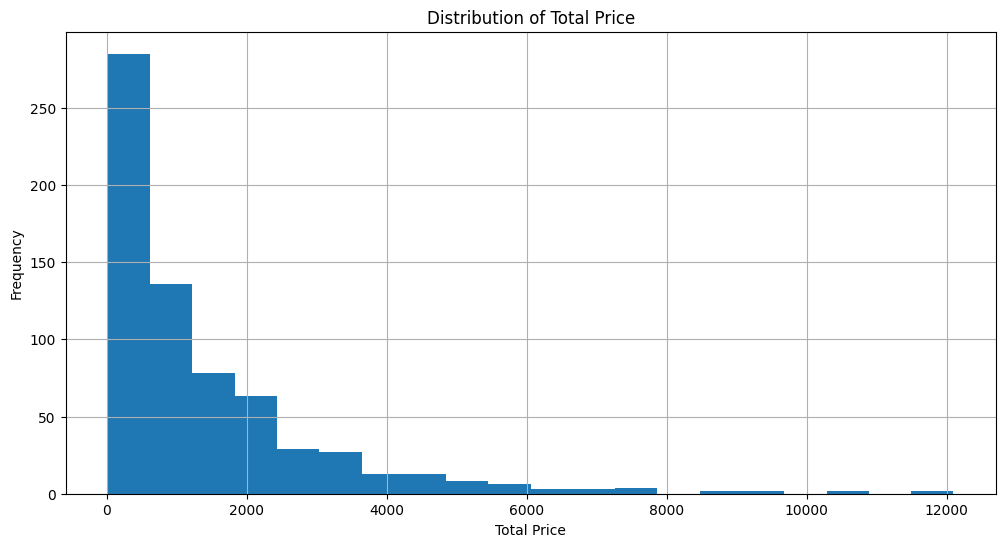

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['total_price'], bins=20)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Now let’s have a look at the distribution of the unit prices using a box plot:

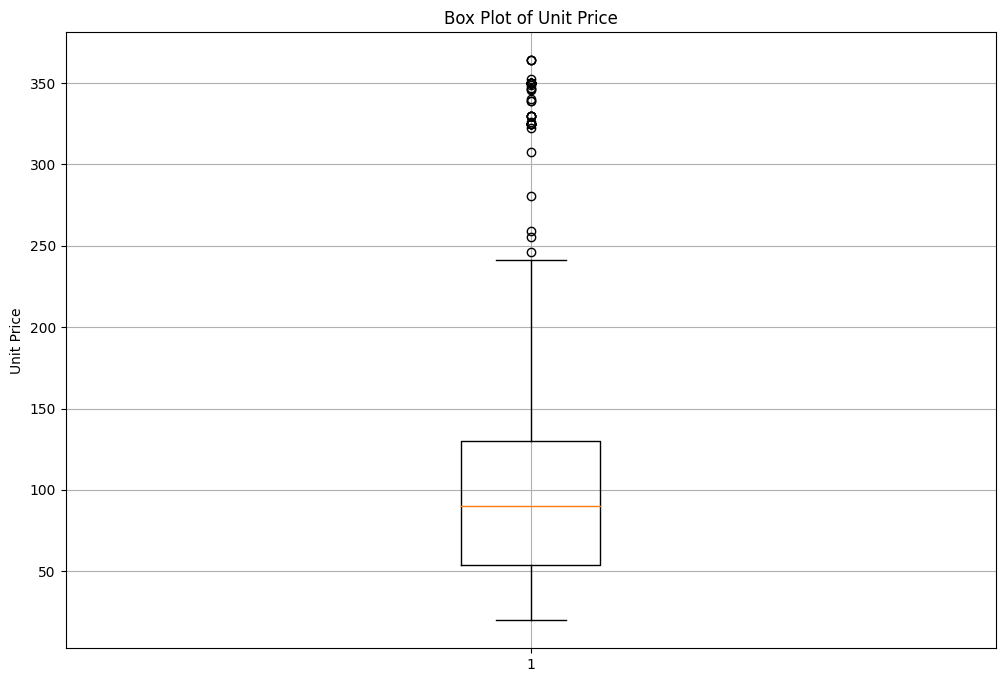

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['unit_price'])
plt.title('Box Plot of Unit Price')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()


Now let’s have a look at the relationship between quantity and total prices:

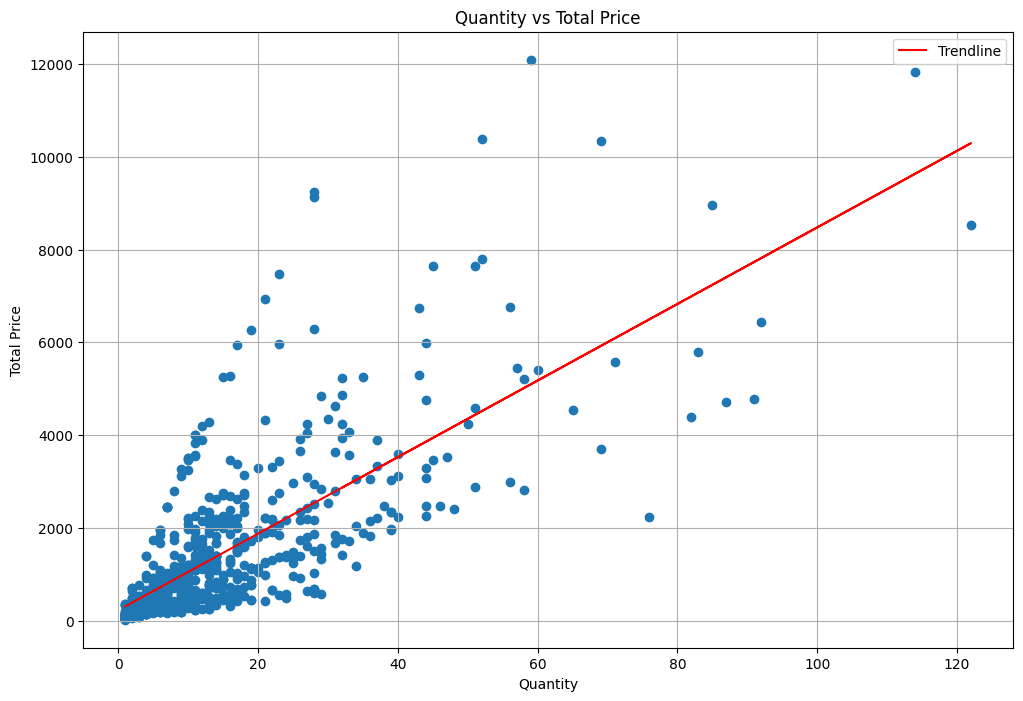

In [ ]:
x = df['qty']
y = df['total_price']

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.title('Quantity vs Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')

# Fit a linear regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Trendline')

plt.legend()
plt.grid(True)
plt.show()


Thus, the relationship between quantity and total prices is linear. It indicates that the price structure is based on a fixed unit price, where the total price is calculated by multiplying the quantity by the unit price.

Now let’s have a look at the average total prices by product categories:

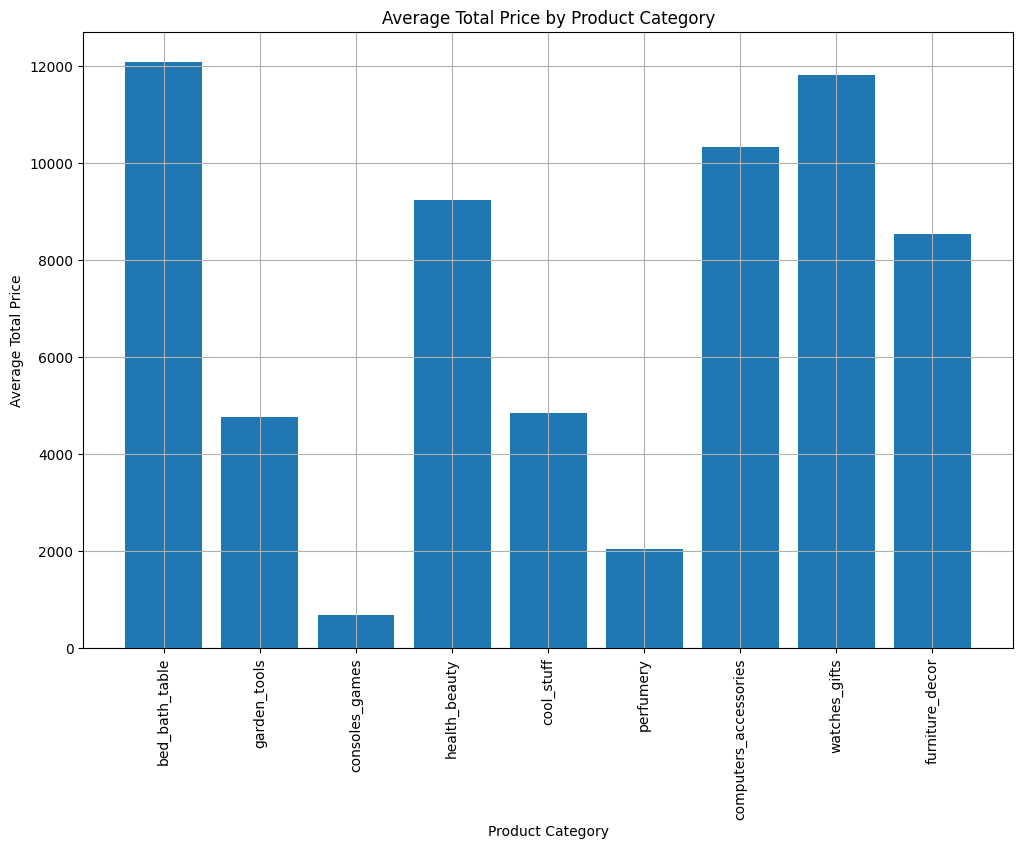

In [ ]:
x = df['product_category_name']
y = df['total_price']

plt.figure(figsize=(12, 8))
plt.bar(x, y)
plt.title('Average Total Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.grid(True)
plt.show()


Now let’s have a look at the distribution of total prices by weekday using a box plot:

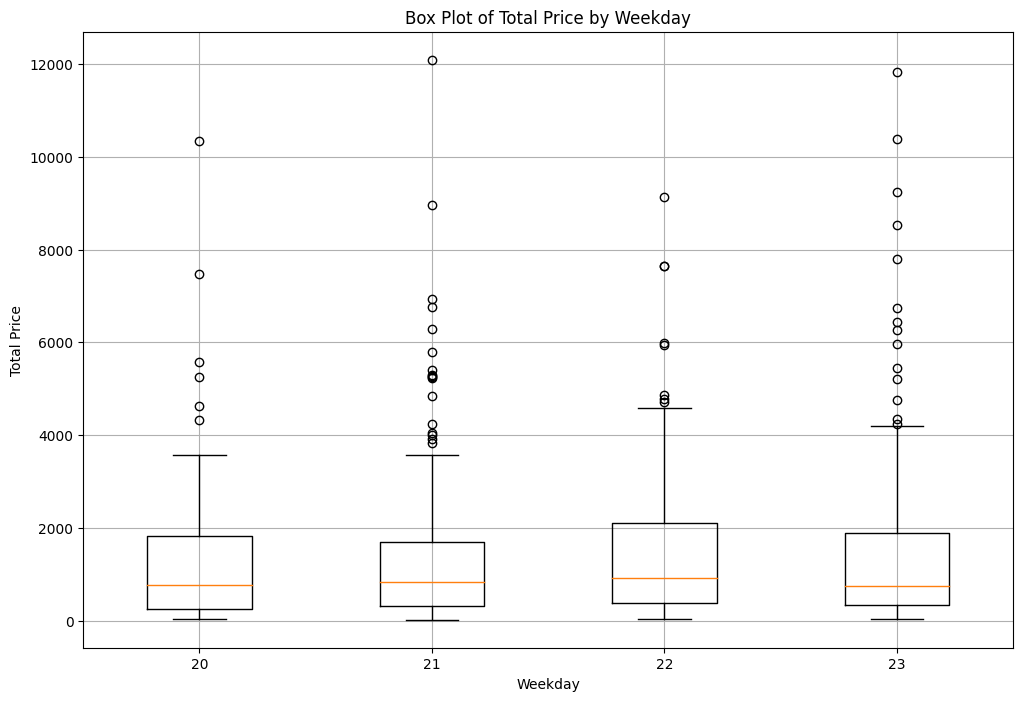

In [ ]:
grouped_data = df.groupby('weekday')['total_price'].apply(list).reset_index()

plt.figure(figsize=(12, 8))
plt.boxplot(grouped_data['total_price'], labels=grouped_data['weekday'])
plt.title('Box Plot of Total Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Price')

plt.grid(True)
plt.show()


Now let’s have a look at the distribution of total prices by holiday using a box plot:

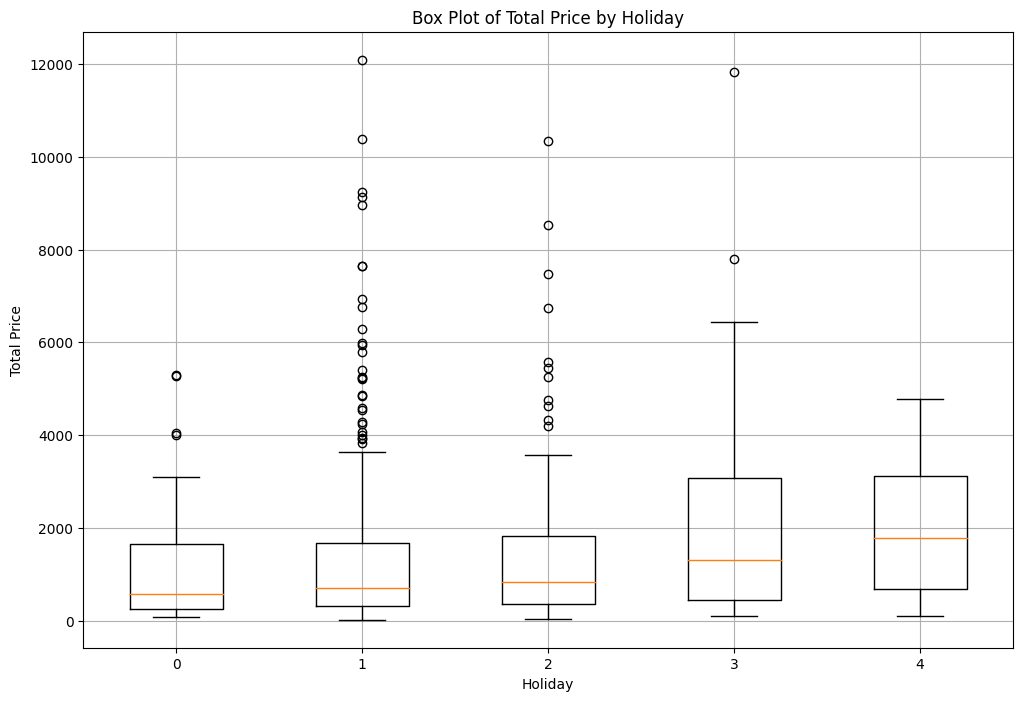

In [ ]:
grouped_data = df.groupby('holiday')['total_price'].apply(list).reset_index()

plt.figure(figsize=(12, 8))
plt.boxplot(grouped_data['total_price'], labels=grouped_data['holiday'])
plt.title('Box Plot of Total Price by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Price')

plt.grid(True)
plt.show()


Now let’s have a look at the correlation between the numerical features with each other:

<ipython-input-46-f8ce0e285ab0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


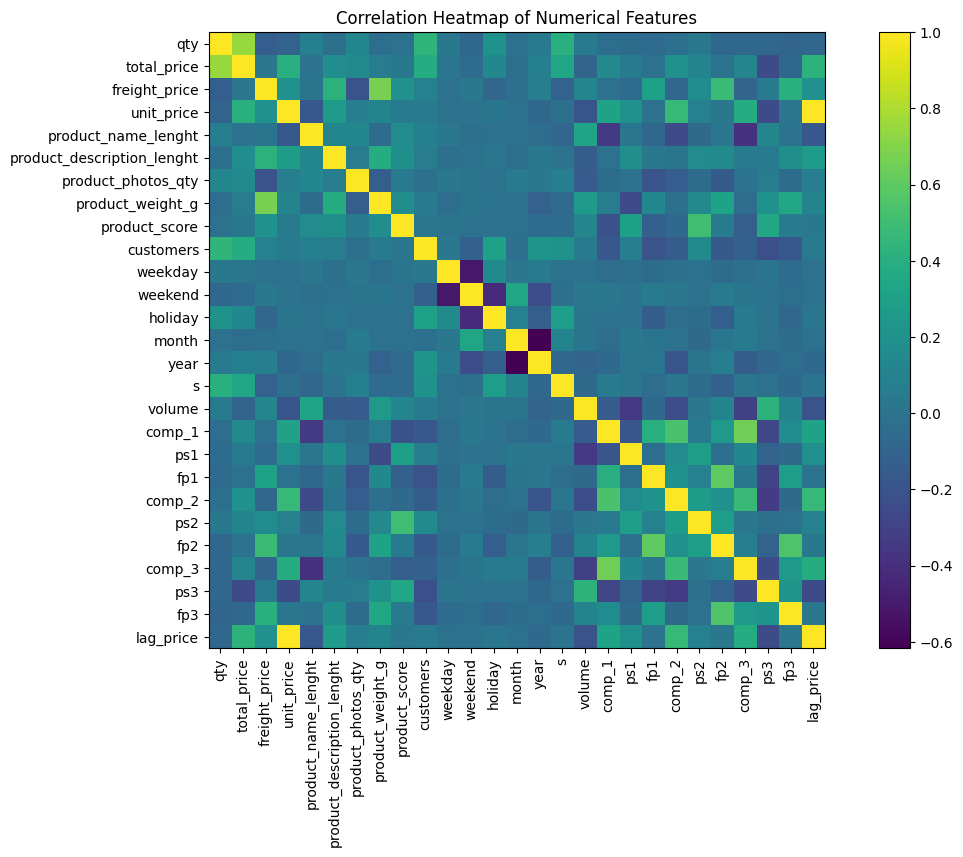

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 8))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Numerical Features')

plt.show()


Analyzing competitors’ pricing strategies is essential in optimizing retail prices. Monitoring and benchmarking against competitors’ prices can help identify opportunities to price competitively, either by pricing below or above the competition, depending on the retailer’s positioning and strategy. Now let’s calculate the average competitor price difference by product category:

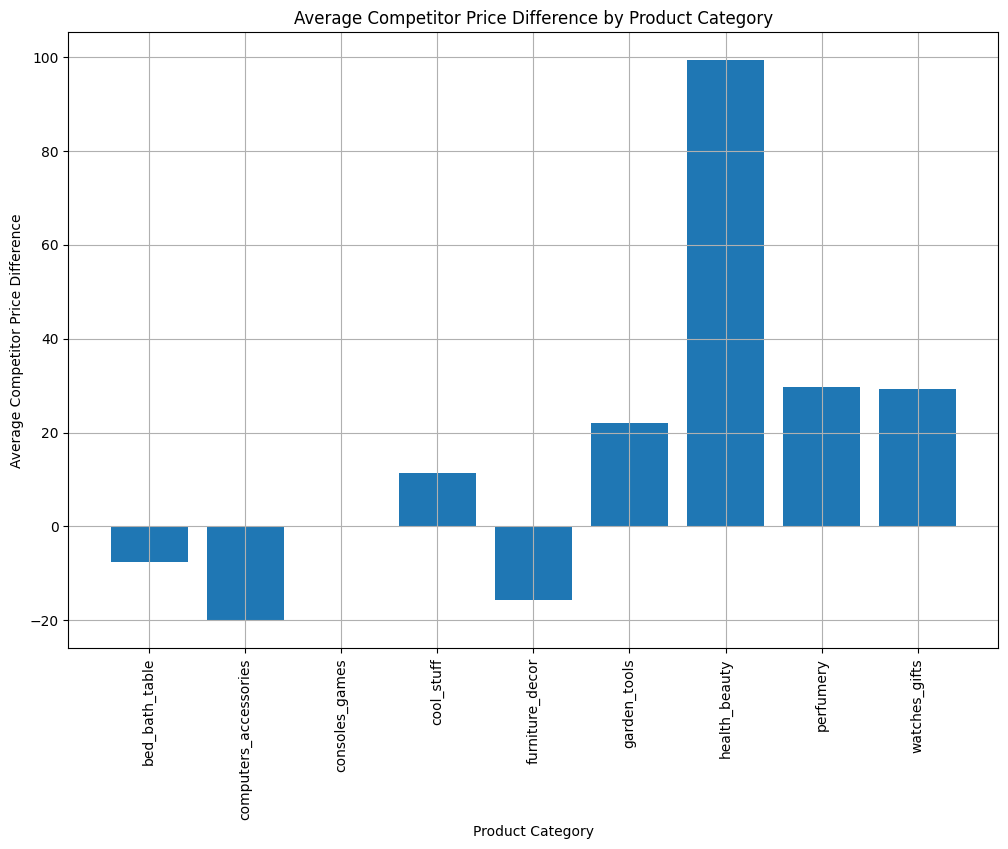

In [ ]:
df['comp_price_diff'] = df['unit_price'] - df['comp_1']

avg_price_diff_by_category = df.groupby('product_category_name')['comp_price_diff'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(avg_price_diff_by_category['product_category_name'], avg_price_diff_by_category['comp_price_diff'])
plt.title('Average Competitor Price Difference by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Competitor Price Difference')
plt.xticks(rotation=90)

plt.grid(True)
plt.show()


**Retail Price Optimization Model with Machine Learning**

Now let’s train a Machine Learning model for the task of Retail Price Optimization. Below is how we can train a Machine Learning model for this problem:

In [ ]:
X = df[['qty', 'unit_price', 'comp_1', 'product_score', 'comp_price_diff']]
y = df['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

Now let’s make predictions and have a look at the predicted retail prices and the actual retail prices:

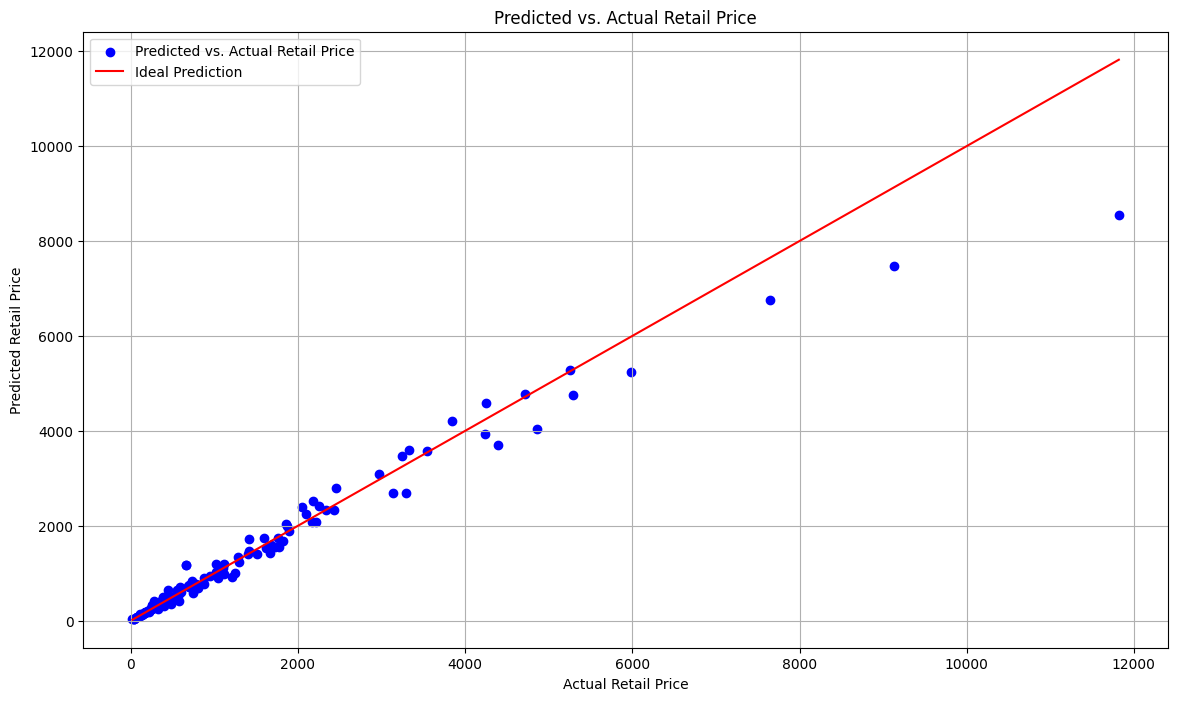

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(14, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual Retail Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction')
plt.title('Predicted vs. Actual Retail Price')
plt.xlabel('Actual Retail Price')
plt.ylabel('Predicted Retail Price')
plt.legend()
plt.grid(True)
plt.show()


The ultimate aim of optimizing retail prices is to charge a price that helps you make the most money and attracts enough customers to buy your products. It involves using data and pricing strategies to find the right price that maximizes your sales and profits while keeping customers happy.